In [ ]:
!pip install utils
!pip insatll xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "insatll" - maybe you meant "install"


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras import datasets, layers, models
import tensorflow as tf

import numpy as np
import os
import utils

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'train.csv', 'solution_format.csv', 'test.csv', 'drive', 'sample_data']


In [ ]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [ ]:
Train_image=train_data.drop('labels',axis ='columns')
Train_label=train_data['labels']

In [ ]:
Train_image=Train_image.to_numpy()
Train_label=Train_label.to_numpy()
Train_reshape_image=Train_image.reshape(-1,20,20,3)

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Train_reshape_image,Train_label,test_size=0.8)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
svm_model = SVC()

In [ ]:
Xtrain_flatten = Xtrain.reshape(Xtrain.shape[0], -1)
Xtest_flatten = Xtest.reshape(Xtest.shape[0], -1)


In [ ]:
# Train the SVM model
svm_model.fit(Xtrain_flatten, Ytrain)

SVC()

In [ ]:

# Predict the classes
svm_predictions = svm_model.predict(Xtest_flatten)


In [ ]:
# Calculate accuracy
svm_accuracy = accuracy_score(Ytest, svm_predictions)

In [ ]:
print("SVM Accuracy: {:.4f}".format(svm_accuracy))

SVM Accuracy: 0.8390


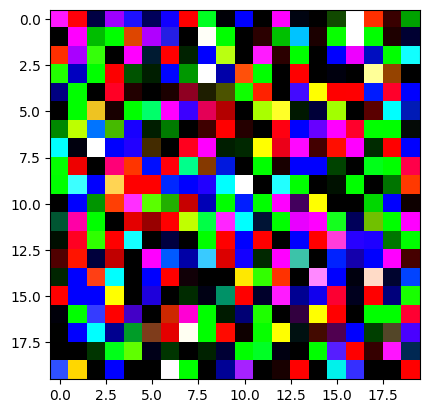

In [ ]:
plt.imshow(Xtrain[2])

In [ ]:
model_cnn = models.Sequential([
        layers.Conv2D(filters=32,kernel_size=(11,11),activation='relu',input_shape=(20,20,3),strides=(2,2),use_bias=True),
        layers.Dropout(0.2),
        layers.MaxPool2D((2,2),padding='same'),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',use_bias=True),
        layers.MaxPool2D((2,2),padding ='same'),

        layers.Flatten(),
        layers.Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(l=0.01)),
        layers.Dropout(0.2),
        layers.Dense(32,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16,activation='softmax')
        ])

opt =tf.keras.optimizers.Adam(learning_rate=0.001)

model_cnn.compile(optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy',]
    )
model_cnn.fit(Xtrain,Ytrain,epochs=50)
accuracy_mod=model_cnn.evaluate(Xtest,Ytest)

Epoch 1/50
33/33 [==============================] - 1s 5ms/step - loss: 4.9469 - accuracy: 0.5552
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 3.1027 - accuracy: 0.7295
Epoch 3/50
33/33 [==============================] - 0s 5ms/step - loss: 2.1303 - accuracy: 0.8362
Epoch 4/50
33/33 [==============================] - 0s 5ms/step - loss: 1.3910 - accuracy: 0.9086
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.8514 - accuracy: 0.9676
Epoch 6/50
33/33 [==============================] - 0s 8ms/step - loss: 0.5462 - accuracy: 0.9829
Epoch 7/50
33/33 [==============================] - 0s 6ms/step - loss: 0.4014 - accuracy: 0.9943
Epoch 8/50
33/33 [==============================] - 0s 6ms/step - loss: 0.3236 - accuracy: 0.9943
Epoch 9/50
33/33 [==============================] - 0s 6ms/step - loss: 0.2625 - accuracy: 0.9962
Epoch 10/50
33/33 [==============================] - 0s 6ms/step - loss: 0.2211 - accuracy: 0.9971
Epoch 11/50
33/33 [

In [ ]:
import numpy as np
from sklearn.metrics import fbeta_score, precision_score, recall_score, f1_score

# Assuming your model's predictions are stored in 'y_pred' variable
y_pred = model_cnn.predict(Xtest)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
f2_score = fbeta_score(Ytest, y_pred_classes, beta=2)
precision = precision_score(Ytest, y_pred_classes)
recall = recall_score(Ytest, y_pred_classes)
f1 = f1_score(Ytest, y_pred_classes)

print("F2 Score: {:.4f}".format(f2_score))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


132/132 [==============================] - 0s 2ms/step
F2 Score: 0.5644
Precision: 0.7252
Recall: 0.5348
F1 Score: 0.6156


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

# Create the SVM model
svm_model = SVC()

# Perform grid search to find optimal hyperparameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='f1')
grid_search.fit(Xtrain_flatten, Ytrain)

# Retrieve the best model and its hyperparameters
best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Predict using the best model
best_svm_predictions = best_svm_model.predict(Xtest_flatten)

# Calculate the F1 score
best_f1_score = f1_score(Ytest, best_svm_predictions)

print("Best F1 Score:", best_f1_score)


Best Parameters: {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
Best F1 Score: 0.611111111111111


In [ ]:
smote = SMOTE(sampling_strategy='minority')
Train_image_sm, Train_label_sm=smote.fit_resample(Train_image,Train_label)

In [ ]:
xg_model=XGBClassifier(n_estimators=1000)

In [ ]:
Xtrain.shape

(1050, 20, 20, 3)

In [ ]:
xg_model.fit(Xtrain_flatten,Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
test_d=test_data.drop('id',axis='columns')
test_d

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [ ]:
submission_pred=xg_model.predict(test_d)
submission_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
submission_data=pd.DataFrame({'id':test_data['id'],'Prediciton':submission_pred})
submission_data

,id,Prediciton
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [ ]:
submission_data.to_csv('submission_xg.csv',index=False)

In [ ]:
predictions = xg_model.predict(Xtest_flatten)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, Ytest)))

Mean Absolute Error : 0.15214285714285714


In [ ]:
from sklearn.metrics import f1_score
f1_score=(Ytest,predictions)
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Ytest,predictions))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3065
           1       0.86      0.52      0.65      1135

    accuracy                           0.85      4200
   macro avg       0.85      0.74      0.78      4200
weighted avg       0.85      0.85      0.83      4200

